##Context
This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math , copy
#File read
file_path = "/content/drive/MyDrive/475_lab/ml_lab/Lab_assignment_2/customer_satisfaction.csv"
df = pd.read_csv(file_path)

In [ ]:
df.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


## About This Dataset
- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of Gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of Seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of On-board service
- Leg room service: Satisfaction level of Leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of Check-in service
- Inflight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival
- Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

## Dropping unnecessary columns

In [ ]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('id', axis=1)

df.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# Replace spaces in the column names with underscore
df.columns = [c.replace(' ', '_') for c in df.columns]

In [ ]:
df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

## Handeling missing values

Here we can see, the 23rd column- Arrival Delay in Minutes has 10 values less.

In [ ]:
# Handeling the missing values with the mean
df['Arrival_Delay_in_Minutes'] = df['Arrival_Delay_in_Minutes'].fillna(df['Arrival_Delay_in_Minutes'].mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer_Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type_of_Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight_Distance                    103904 non-null  int64  
 6   Inflight_wifi_service              103904 non-null  int64  
 7   Departure/Arrival_time_convenient  103904 non-null  int64  
 8   Ease_of_Online_booking             103904 non-null  int64  
 9   Gate_location                      103904 non-null  int64  
 10  Food_and_drink                     103904 non-null  int64  
 11  Online_boarding                    1039

## Label encoding for categorical values

In [ ]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

In [ ]:
df.head(10)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,0,0,26,1,1,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,0
6,1,0,47,1,1,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,0
7,0,0,52,0,0,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,1
8,0,0,41,0,0,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,0
9,1,1,20,0,1,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0.0,0


#TEST & TRAIN

In [ ]:
X = df.drop(columns=['satisfaction'])
Y = df['satisfaction']
x=X.values
y=Y.values
# Split the dataset in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Model run time calculation


In [ ]:
import time
from sklearn.metrics import accuracy_score
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    time_taken = time.time()-t0
    print("Accuracy = {}%".format(accuracy))
    print("Time taken = {}".format(time_taken))

    return model, accuracy, time_taken

#Models

##1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 87.54330809701014%
Time taken = 1.6658799648284912


## 2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 12,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 93.00333632747338%
Time taken = 0.15196681022644043


## 3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf,  tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Accuracy = 95.93545489541897%
Time taken = 10.94474983215332


## 4. Support Vector Machine

In [ ]:
from sklearn import svm

model_svm = svm.SVC(kernel='sigmoid')
model_svm, accuracy_svm,  tt_svm = run_model(model_svm, X_train, y_train, X_test, y_test)

Accuracy = 77.50866161940203%
Time taken = 254.5606951713562


## 5. Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 100}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

Accuracy = 93.63210573591685%
Time taken = 42.494606256484985


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Comparison of The Models

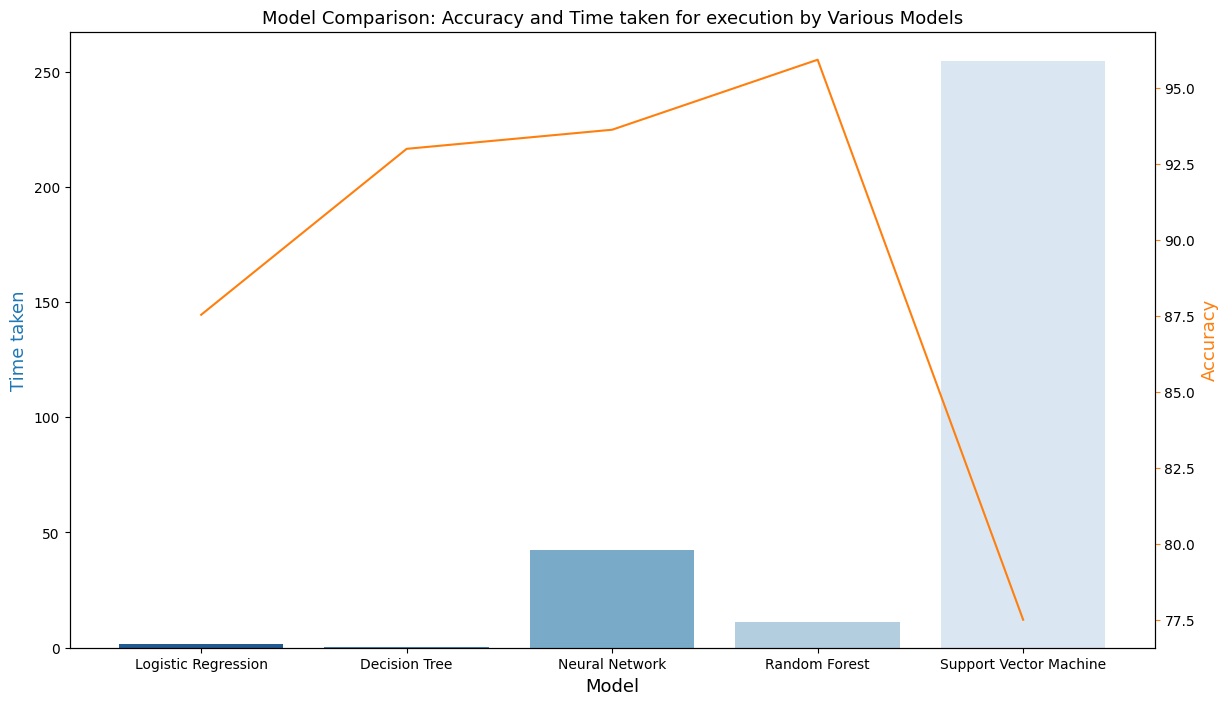

In [ ]:
import seaborn as sns
auc_scores = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_svm]
tt = [tt_lr, tt_dt, tt_nn, tt_rf, tt_svm]

model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network','Random Forest','Support Vector Machine'],
              'Accuracy': auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution by Various Models', fontsize=13)
color = 'tab:blue'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='Blues_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

## Conclusion

From the comparison graph, we can see that, the maximum time is taken by the Support Vector Machine which is arround 4.5mins and the decision tree took the minimum time which is less than 1 second, logistic regression is pretty similar with that in compared to time. However, in this dataset, we can see that the Random Forest out performed all the models with the accuracy of 95.93%.